In [1]:
# import data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# load data
df = pd.read_csv("jiji_housing_raw.csv")
df.head()

,title,region,region_item_text,region_name,region_parent_name,price_title,property_size,bedrooms,bathrooms,furnishing,is_boost
0,"4bdrm Duplex in Abuja Estate, Owerri for sale","Imo State, Owerri","Imo, Owerri",Owerri,Imo State,"₦ 170,000,000",600,4,5,unfurnished,vip
1,"Furnished 5bdrm Bungalow in Prime Property, Be...","Edo State, Benin City","Edo, Benin City",Benin City,Edo State,"₦ 45,000,000",1500,5,4,furnished,diamond
2,2bdrm Block of Flats in Uyo for sale,"Akwa Ibom State, Uyo","Akwa Ibom, Uyo",Uyo,Akwa Ibom State,"₦ 30,000,000",400,2,1,unfurnished,NaN
3,"Furnished 6bdrm Duplex in Port Harcourt, Obio-...","Rivers State, Obio-Akpor","Rivers, Obio-Akpor",Obio-Akpor,Rivers State,"₦ 150,000,000",1162,6,6,furnished,NaN
4,"12bdrm Block of Flats in Kapua, FHA for sale","Lugbe District, FHA","Abuja, Lugbe District",FHA,Lugbe District,"₦ 250,000,000",1300,12,16,semi-furnished,NaN


In [3]:
# make is_boost boolean
df["boosted"] = df["is_boost"].notna()
df.drop(columns=["is_boost"], inplace=True)
df.head()

,title,region,region_item_text,region_name,region_parent_name,price_title,property_size,bedrooms,bathrooms,furnishing,boosted
0,"4bdrm Duplex in Abuja Estate, Owerri for sale","Imo State, Owerri","Imo, Owerri",Owerri,Imo State,"₦ 170,000,000",600,4,5,unfurnished,True
1,"Furnished 5bdrm Bungalow in Prime Property, Be...","Edo State, Benin City","Edo, Benin City",Benin City,Edo State,"₦ 45,000,000",1500,5,4,furnished,True
2,2bdrm Block of Flats in Uyo for sale,"Akwa Ibom State, Uyo","Akwa Ibom, Uyo",Uyo,Akwa Ibom State,"₦ 30,000,000",400,2,1,unfurnished,False
3,"Furnished 6bdrm Duplex in Port Harcourt, Obio-...","Rivers State, Obio-Akpor","Rivers, Obio-Akpor",Obio-Akpor,Rivers State,"₦ 150,000,000",1162,6,6,furnished,False
4,"12bdrm Block of Flats in Kapua, FHA for sale","Lugbe District, FHA","Abuja, Lugbe District",FHA,Lugbe District,"₦ 250,000,000",1300,12,16,semi-furnished,False


In [4]:
# inspecting data
df.isnull().sum()

title                 0
region                0
region_item_text      0
region_name           0
region_parent_name    4
price_title           0
property_size         0
bedrooms              0
bathrooms             0
furnishing            0
boosted               0
dtype: int64

In [5]:
# dropping missing values
df = df.dropna(subset=["region_parent_name"])
df.isnull().sum()

title                 0
region                0
region_item_text      0
region_name           0
region_parent_name    0
price_title           0
property_size         0
bedrooms              0
bathrooms             0
furnishing            0
boosted               0
dtype: int64

In [6]:
# price cleaning
df["price_title"]=(
    df["price_title"]
    .str.replace("₦", "", regex=False)
    .str.replace(",", "")
    .astype(float)
)

In [7]:
# droping price > 550 million
df = df[df["price_title"] <= 550_000_000] 

In [8]:
num_cols = df[["price_title"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

price_title    0
dtype: int64

In [9]:
# Categorical Cleaning and Standardize
df["furnishing"] = df["furnishing"].astype(str).str.capitalize()

In [10]:
# create state and price_m2 column
df["state"] = df["region_item_text"].str.split(",", expand=True)[0]
df["price_m2"] = df["price_title"] / df["property_size"]
df.head()

,title,region,region_item_text,region_name,region_parent_name,price_title,property_size,bedrooms,bathrooms,furnishing,boosted,state,price_m2
0,"4bdrm Duplex in Abuja Estate, Owerri for sale","Imo State, Owerri","Imo, Owerri",Owerri,Imo State,170000000.0,600,4,5,Unfurnished,True,Imo,283333.333333
1,"Furnished 5bdrm Bungalow in Prime Property, Be...","Edo State, Benin City","Edo, Benin City",Benin City,Edo State,45000000.0,1500,5,4,Furnished,True,Edo,30000.000000
2,2bdrm Block of Flats in Uyo for sale,"Akwa Ibom State, Uyo","Akwa Ibom, Uyo",Uyo,Akwa Ibom State,30000000.0,400,2,1,Unfurnished,False,Akwa Ibom,75000.000000
3,"Furnished 6bdrm Duplex in Port Harcourt, Obio-...","Rivers State, Obio-Akpor","Rivers, Obio-Akpor",Obio-Akpor,Rivers State,150000000.0,1162,6,6,Furnished,False,Rivers,129087.779690
4,"12bdrm Block of Flats in Kapua, FHA for sale","Lugbe District, FHA","Abuja, Lugbe District",FHA,Lugbe District,250000000.0,1300,12,16,Semi-furnished,False,Abuja,192307.692308


In [11]:
# drop unecessary columns
df.drop(columns=["region_item_text", "region_parent_name" ], inplace=True)
df.head()

,title,region,region_name,price_title,property_size,bedrooms,bathrooms,furnishing,boosted,state,price_m2
0,"4bdrm Duplex in Abuja Estate, Owerri for sale","Imo State, Owerri",Owerri,170000000.0,600,4,5,Unfurnished,True,Imo,283333.333333
1,"Furnished 5bdrm Bungalow in Prime Property, Be...","Edo State, Benin City",Benin City,45000000.0,1500,5,4,Furnished,True,Edo,30000.000000
2,2bdrm Block of Flats in Uyo for sale,"Akwa Ibom State, Uyo",Uyo,30000000.0,400,2,1,Unfurnished,False,Akwa Ibom,75000.000000
3,"Furnished 6bdrm Duplex in Port Harcourt, Obio-...","Rivers State, Obio-Akpor",Obio-Akpor,150000000.0,1162,6,6,Furnished,False,Rivers,129087.779690
4,"12bdrm Block of Flats in Kapua, FHA for sale","Lugbe District, FHA",FHA,250000000.0,1300,12,16,Semi-furnished,False,Abuja,192307.692308


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1633 non-null   object 
 1   region         1633 non-null   object 
 2   region_name    1633 non-null   object 
 3   price_title    1633 non-null   float64
 4   property_size  1633 non-null   int64  
 5   bedrooms       1633 non-null   int64  
 6   bathrooms      1633 non-null   int64  
 7   furnishing     1633 non-null   object 
 8   boosted        1633 non-null   bool   
 9   state          1633 non-null   object 
 10  price_m2       1633 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 141.9+ KB


In [13]:
# check for duuplicated rows
df["title"].duplicated().sum()

np.int64(375)

In [14]:
# drop duplicates
df.drop_duplicates(subset=["title"], inplace=True)

In [15]:
df.to_csv("jiji_housing_cleaned.csv", index=False)

In [16]:
df["price_title"].describe()

count    1.258000e+03
mean     2.081045e+08
std      1.395085e+08
min      3.000000e+06
25%      9.000000e+07
50%      1.800000e+08
75%      3.000000e+08
max      5.500000e+08
Name: price_title, dtype: float64

In [17]:
# price analysis(mean_price)
mean_price = df["price_title"].mean()
print("The average price of housing in Nigeria (jiji) is ", mean_price)

The average price of housing in Nigeria (jiji) is  208104523.12241653


In [18]:
# state with the highest and lowest mean property price
state_by_avg_price = df.groupby("state")["price_title"].mean().sort_values(ascending=False)
state_by_avg_price

state
Ebonyi       3.500000e+08
Lagos        2.415891e+08
Abuja        2.061908e+08
Rivers       2.017000e+08
Enugu        1.957121e+08
Oyo          1.476732e+08
Edo          1.440333e+08
Imo          1.239000e+08
Jigawa       7.500000e+07
Ondo         6.670833e+07
Kogi         6.500000e+07
Delta        4.537500e+07
Ogun         4.488462e+07
Osun         4.112500e+07
Akwa Ibom    3.000000e+07
Benue        1.500000e+07
Abia         1.050000e+07
Kwara        8.500000e+06
Name: price_title, dtype: float64

In [19]:
# Property Size & Features
state_by_ppt_size = df.groupby("state")["property_size"].mean().sort_values(ascending=False)
state_by_ppt_size

state
Delta        1567.250000
Ebonyi       1300.000000
Ondo         1023.833333
Edo           897.566667
Benue         750.000000
Abuja         657.670732
Oyo           604.143791
Rivers        589.342857
Imo           558.800000
Enugu         557.500000
Ogun          541.769231
Osun          501.500000
Lagos         477.593701
Kwara         401.500000
Akwa Ibom     400.000000
Kogi          289.000000
Abia          232.000000
Jigawa        180.000000
Name: property_size, dtype: float64

In [20]:
df["property_size"].describe()

count    1258.000000
mean      563.678060
std       424.729936
min        10.000000
25%       350.000000
50%       500.000000
75%       600.000000
max      5000.000000
Name: property_size, dtype: float64

In [21]:
bedrm_by_price = df.groupby("bedrooms")["price_title"].mean().sort_values(ascending=False)
bedrm_by_price

# from this, more bedroom does not directly equal more price, but it strongly affects the price

bedrooms
5     3.184880e+08
7     2.607143e+08
20    2.570833e+08
6     2.513289e+08
11    2.433333e+08
4     2.223164e+08
16    1.750000e+08
10    1.637500e+08
18    1.592857e+08
12    1.424545e+08
8     1.400000e+08
3     1.370281e+08
2     1.223018e+08
1     7.815152e+07
9     5.187500e+07
Name: price_title, dtype: float64

In [22]:
# Regional Trends
region_count = df.groupby("region")["price_title"].count().sort_values(ascending=False)
region_count

region
Enugu State, Enugu                  66
Oyo State, Ibadan                   57
Lagos State, Lekki                  54
Rivers State, Port-Harcourt         51
Lekki, Chevron                      44
                                    ..
Sagamu, Shimawa                      1
Surulere, Abraham Adesanya           1
Victoria Island, Ligali Ayorinde     1
Wuse, Zone 4 / Wuse                  1
Yaba, Ebute Metta                    1
Name: price_title, Length: 224, dtype: int64

In [23]:
# regions that dominate premium property sales
premium_sales = df[df["boosted"] == True]
premium_by_region = premium_sales.groupby("region")["boosted"].count().sort_values(ascending=False)
premium_by_region

region
Enugu State, Enugu                  56
Lagos State, Lekki                  53
Oyo State, Ibadan                   53
Rivers State, Port-Harcourt         51
Lekki, Chevron                      42
                                    ..
Sagamu, Shimawa                      1
Shomolu, Palmgroove                  1
Surulere, Abraham Adesanya           1
Victoria Island, Ligali Ayorinde     1
Yaba, Ebute Metta                    1
Name: boosted, Length: 208, dtype: int64

In [24]:
# Furnishing Analysis
Furnishing_avg_price = df.groupby("furnishing")["price_title"].mean().sort_values(ascending=False)
Furnishing_avg_price

furnishing
Furnished         2.207926e+08
Semi-furnished    2.198782e+08
Unfurnished       1.939347e+08
Name: price_title, dtype: float64

In [25]:
# Listing Type
boosted_by_price = df.groupby("boosted")["price_title"].mean().sort_values(ascending=False)
boosted_by_price

# boosted listings have higher prices

boosted
True     2.140741e+08
False    1.315495e+08
Name: price_title, dtype: float64

In [26]:
# Visualization

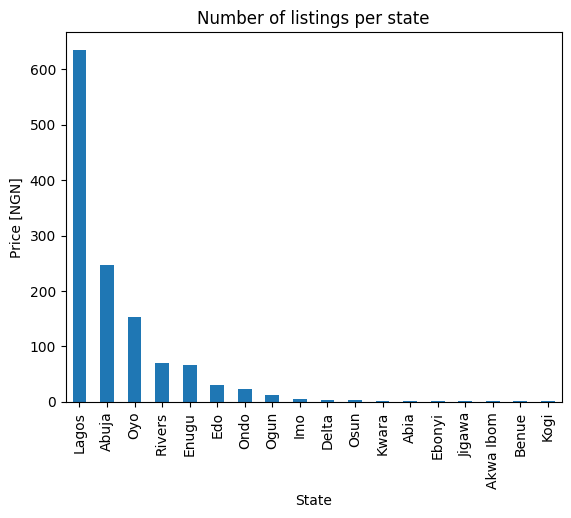

In [27]:
# Bar Chart: Number of listings per state
(
    df
    .groupby("state")
    ["price_title"].count()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Price [NGN]",
        title="Number of listings per state"
    )
);

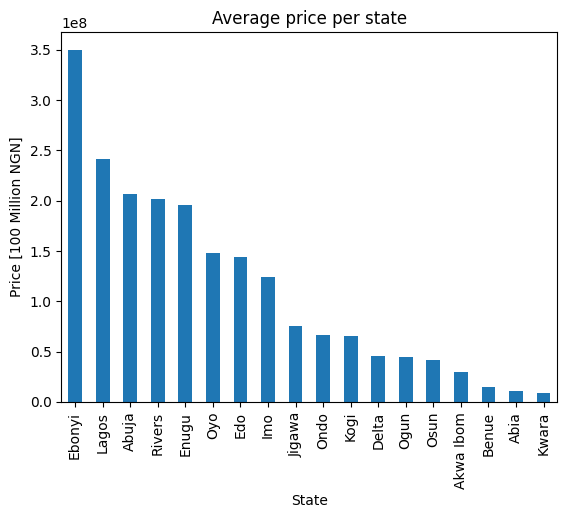

In [28]:
# Bar Chart: Average price per state
(
    df
    .groupby("state")
    ["price_title"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Price [100 Million NGN]",
        title="Average price per state"
    )
);

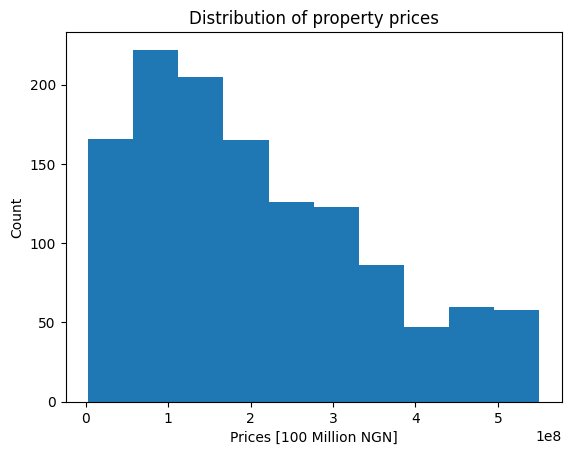

In [29]:
# Histogram: Distribution of property prices
plt.hist(df["price_title"])
plt.xlabel("Prices [100 Million NGN]")
plt.ylabel("Count")
plt.title("Distribution of property prices");

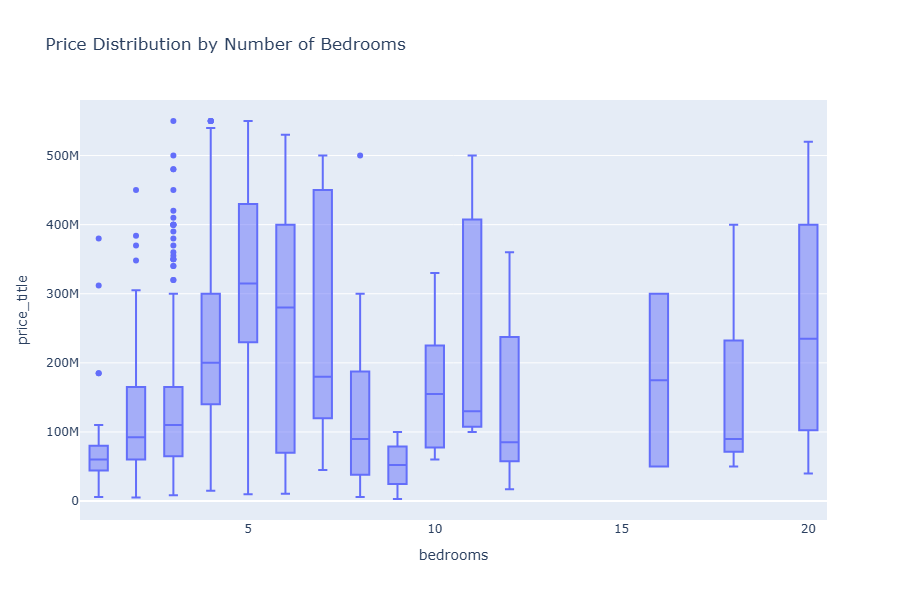

In [30]:
# Boxplot: Price by number of bedrooms
fig = px.box(
    df,
    x="bedrooms",
    y="price_title",
    title="Price Distribution by Number of Bedrooms"
    # points="all"
)
fig.update_layout(width=600, height=600)
fig.show()

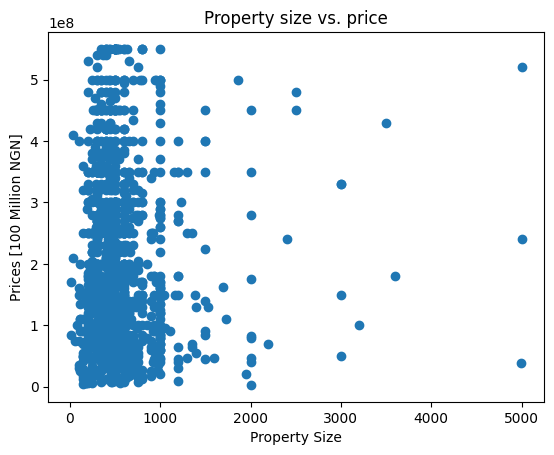

In [31]:
# Scatter Plot: Property size vs. price
plt.scatter(df["property_size"], df["price_title"])
plt.xlabel("Property Size")
plt.ylabel("Prices [100 Million NGN]")
plt.title("Property size vs. price")
plt.show()

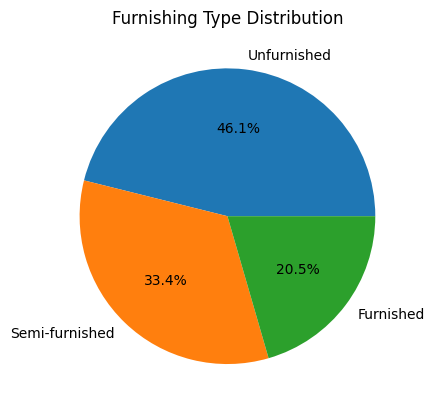

In [33]:
# Pie Chart: Furnishing type distribution
furnishing_counts = df["furnishing"].value_counts()
plt.pie(
    furnishing_counts,
    labels=furnishing_counts.index,
    autopct="%1.1f%%",
)
plt.title("Furnishing Type Distribution")
plt.show()

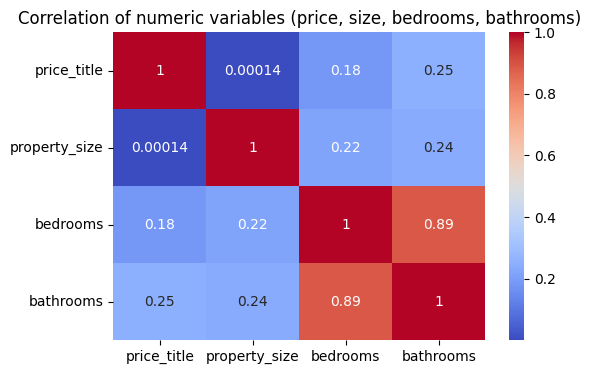

In [34]:
# Heatmap: Correlation of numeric variables (price, size, bedrooms, bathrooms)
corr = df[["price_title", "property_size", "bedrooms", "bathrooms"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.title("Correlation of numeric variables (price, size, bedrooms, bathrooms)")
plt.show()